In [1]:
#You need to upload AUS_10K_RAW.csv or AUS_10K_ARRDELAY.csv to Jupyter Notebook or use os library to read from local disk

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('bmh')

In [3]:
df = pd.read_csv('AUS_10K_ARRDELAY.csv')
df = df.rename(columns={'Unnamed: 0': 'Index'})
df.head()

,Index,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,CRS_DEP_TIME,DEP_TIME,...,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,25091,12,23,5,19805,1796,1042302,1288904,720,821.0,...,3.0,179.0,175.0,1090.0,5,57.0,0.0,0.0,0.0,0.0
1,85336,10,25,2,19805,1518,1042302,1330303,1645,1736.0,...,1.0,164.0,139.0,1103.0,5,0.0,0.0,0.0,0.0,26.0
2,63476,7,28,4,19930,1254,1042302,1405702,1735,1741.0,...,1.0,250.0,268.0,1715.0,7,6.0,0.0,18.0,0.0,0.0
3,18212,11,25,5,19393,1883,1042302,1537002,1030,1137.0,...,3.0,90.0,68.0,426.0,2,45.0,0.0,0.0,0.0,0.0
4,29171,3,12,6,19393,2891,1042302,1498603,1610,1653.0,...,1.0,135.0,121.0,936.0,4,0.0,0.0,10.0,0.0,19.0


In [4]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   10000 non-null  int64  
 1   MONTH                   10000 non-null  int64  
 2   DAY_OF_MONTH            10000 non-null  int64  
 3   DAY_OF_WEEK             10000 non-null  int64  
 4   MKT_CARRIER_AIRLINE_ID  10000 non-null  int64  
 5   OP_CARRIER_FL_NUM       10000 non-null  int64  
 6   ORIGIN_AIRPORT_SEQ_ID   10000 non-null  int64  
 7   DEST_AIRPORT_SEQ_ID     10000 non-null  int64  
 8   CRS_DEP_TIME            10000 non-null  int64  
 9   DEP_TIME                10000 non-null  float64
 10  DEP_DELAY               10000 non-null  float64
 11  DEP_DEL15               10000 non-null  float64
 12  DEP_DELAY_GROUP         10000 non-null  float64
 13  CRS_ARR_TIME            10000 non-null  int64  
 14  ARR_TIME                10000 non-null 

In [16]:
df.describe()

,Index,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,43016.689600,6.679100,15.70970,4.088000,19696.355500,1877.971600,1042302.0,1.269968e+06,1486.012100,1566.148000,65.911900,0.83420,3.253000,1683.786400,1645.913900,67.663500,1.0,3.428000,153.896300,155.647900,958.067100,4.278200,25.085300,2.065300,8.950000,0.204900,31.358000
std,23801.554279,3.331311,8.65534,1.994857,301.575506,1293.622942,0.0,1.436143e+05,435.771498,458.569546,104.145538,0.37192,3.417625,461.815659,586.499606,102.251829,0.0,3.192277,58.696254,61.739429,471.936369,1.834378,78.062138,22.924266,24.902267,3.304483,64.889585
min,0.000000,1.000000,1.00000,1.000000,19393.000000,16.000000,1042302.0,1.014005e+06,500.000000,2.000000,-19.000000,0.00000,-2.000000,5.000000,1.000000,15.000000,1.0,1.000000,55.000000,37.000000,140.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24202.750000,4.000000,8.00000,2.000000,19393.000000,820.000000,1042302.0,1.129806e+06,1200.000000,1242.000000,22.000000,1.00000,1.000000,1355.000000,1347.000000,23.000000,1.0,1.000000,124.000000,118.000000,756.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42792.500000,7.000000,16.00000,4.000000,19805.000000,1542.500000,1042302.0,1.288903e+06,1540.500000,1633.000000,40.000000,1.00000,2.000000,1757.000000,1805.000000,38.000000,1.0,2.000000,155.000000,156.000000,994.000000,4.000000,6.000000,0.000000,0.000000,0.000000,12.000000
75%,63466.750000,9.000000,23.00000,6.000000,19805.000000,2706.250000,1042302.0,1.393007e+06,1830.000000,1932.000000,74.000000,1.00000,4.000000,2050.000000,2109.000000,72.000000,1.0,4.000000,185.000000,191.000000,1226.000000,5.000000,21.000000,0.000000,10.000000,0.000000,37.000000
max,86854.000000,12.000000,31.00000,7.000000,20436.000000,8788.000000,1042302.0,1.591904e+06,2348.000000,2400.000000,2109.000000,1.00000,12.000000,2359.000000,2400.000000,2090.000000,1.0,12.000000,520.000000,548.000000,3764.000000,11.000000,2090.000000,1165.000000,1204.000000,149.000000,1543.000000


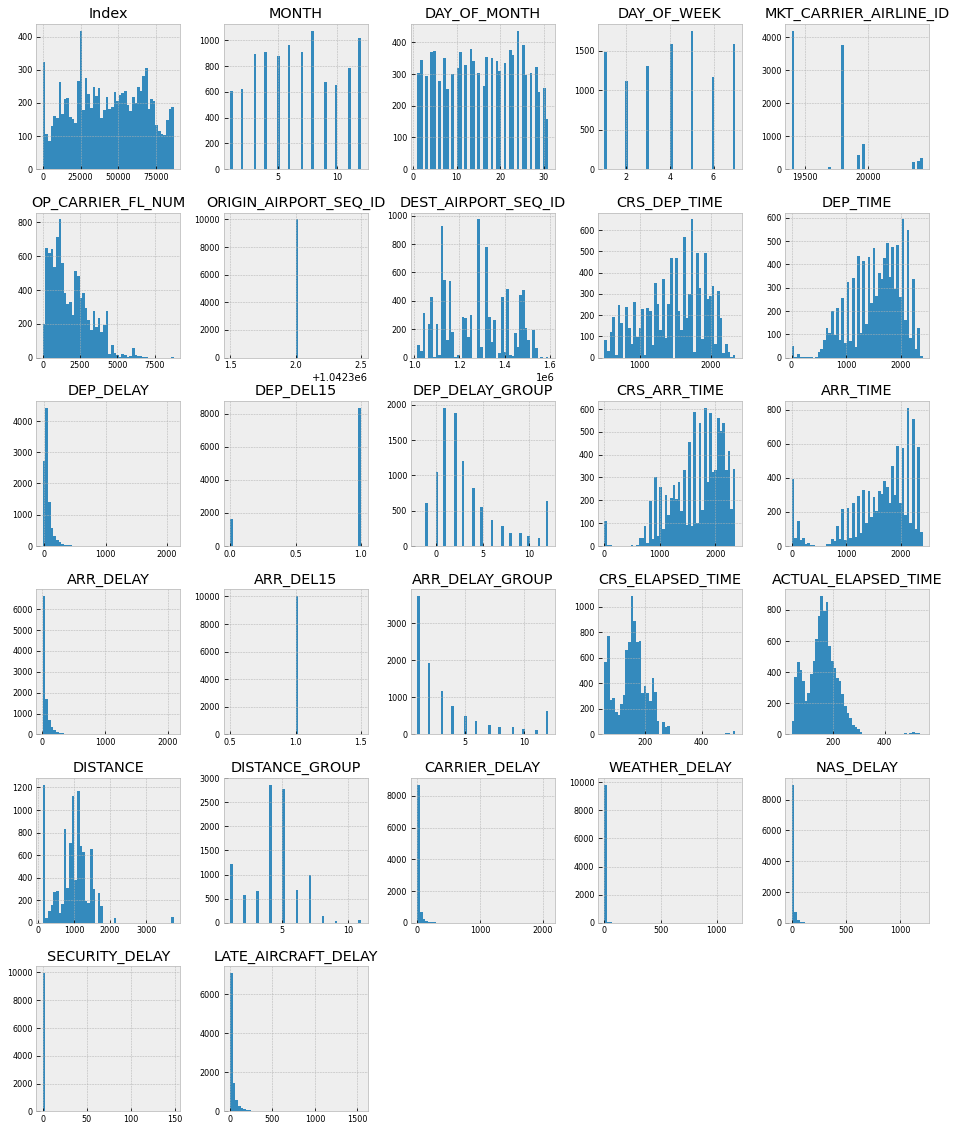

In [26]:
#All numeric values v. all numeric values plots
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

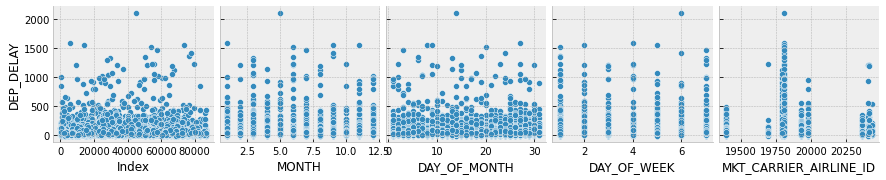

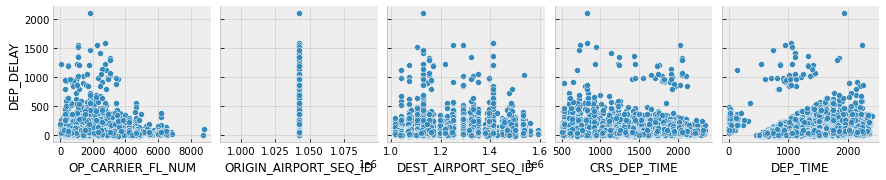

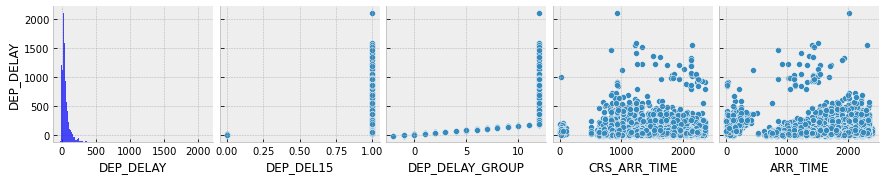

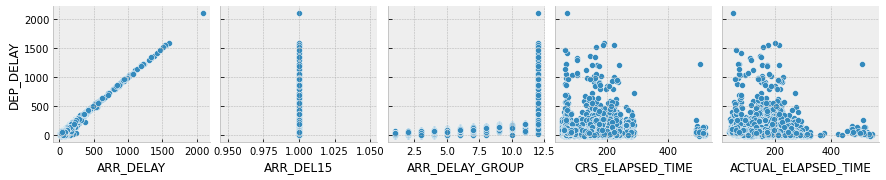

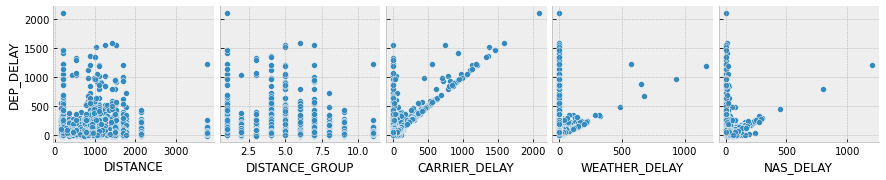

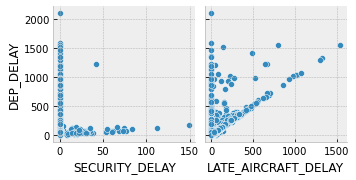

In [6]:
#DEP_DELAY v. all other values
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['DEP_DELAY'])

In [18]:
#Filter Departure Delay >=15 min
delay_data=df[df.DEP_DELAY>=15]
pd.set_option('display.max_columns', None)
delay_data.head()

,Index,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,25091,12,23,5,19805,1796,1042302,1288904,720,821.0,61.0,1.0,4.0,819,916.0,57.0,1.0,3.0,179.0,175.0,1090.0,5,57.0,0.0,0.0,0.0,0.0
1,85336,10,25,2,19805,1518,1042302,1330303,1645,1736.0,51.0,1.0,3.0,2029,2055.0,26.0,1.0,1.0,164.0,139.0,1103.0,5,0.0,0.0,0.0,0.0,26.0
3,18212,11,25,5,19393,1883,1042302,1537002,1030,1137.0,67.0,1.0,4.0,1200,1245.0,45.0,1.0,3.0,90.0,68.0,426.0,2,45.0,0.0,0.0,0.0,0.0
4,29171,3,12,6,19393,2891,1042302,1498603,1610,1653.0,43.0,1.0,2.0,1925,1954.0,29.0,1.0,1.0,135.0,121.0,936.0,4,0.0,0.0,10.0,0.0,19.0
5,60900,7,18,1,19790,1239,1042302,1143302,1811,1829.0,18.0,1.0,1.0,2210,2227.0,17.0,1.0,1.0,179.0,178.0,1149.0,5,0.0,0.0,0.0,0.0,17.0


Text(0.5, 1.0, 'Density Plot of Departure Delay')

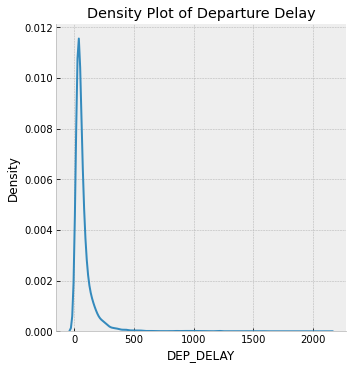

In [13]:
#Density Plot of Departure Delay
sns.displot(data=delay_data, x="DEP_DELAY",kind="kde")
plt.title('Density Plot of Departure Delay')
#plt.ylim(0, 5000)
#plt.xlim(0, 100)

(0.0, 400.0)

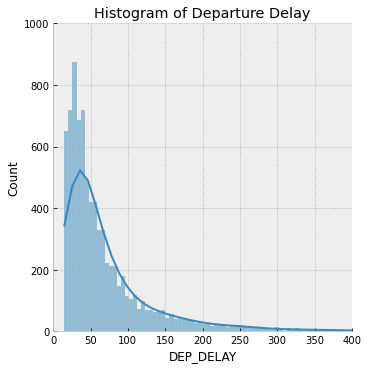

In [15]:
#Histogram of Departure Delay
sns.displot(data=delay_data, x="DEP_DELAY",kde=True)
plt.title("Histogram of Departure Delay")
plt.ylim(0, 1000)
plt.xlim(0, 400)

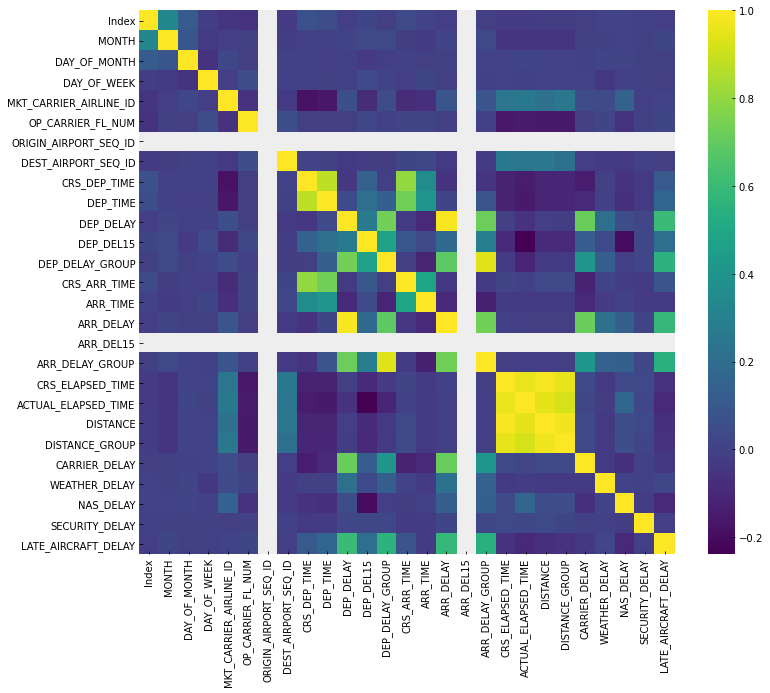

In [10]:
#"Heat Map", full
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(df.corr(), cmap="viridis", annot=False)

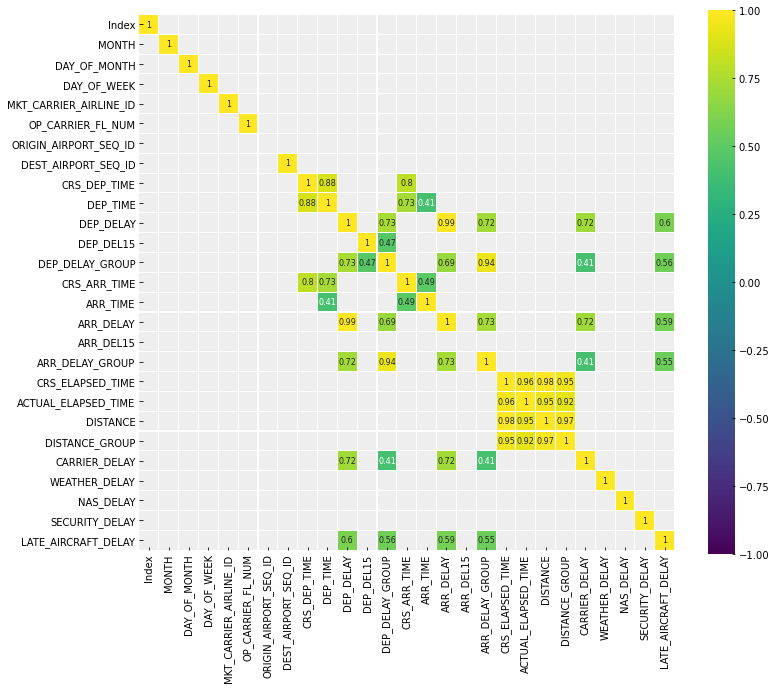

In [11]:
#"Heap Map", filtered
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);